In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Notebook is working")


Notebook is working


In [2]:
df = pd.read_csv("dataset/train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Shape (rows, columns):", df.shape)
df.info()


Shape (rows, columns): (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum().sort_values(ascending=False)


Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [6]:
df = df.drop(columns=["Cabin"])


In [7]:

df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df.isnull().sum().sort_values(ascending=False)



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

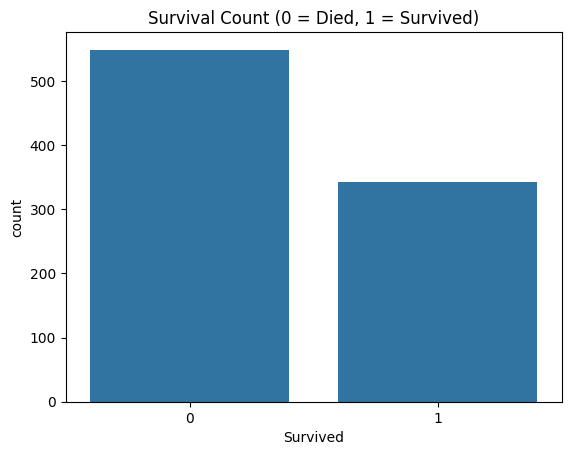

In [8]:
sns.countplot(x="Survived", data=df)
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()


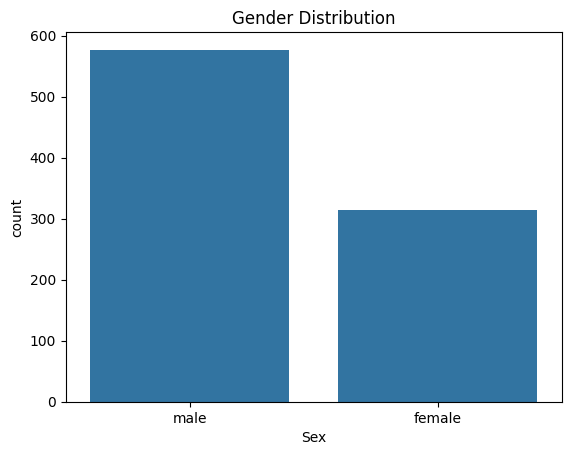

In [9]:
sns.countplot(x="Sex", data=df)
plt.title("Gender Distribution")
plt.show()


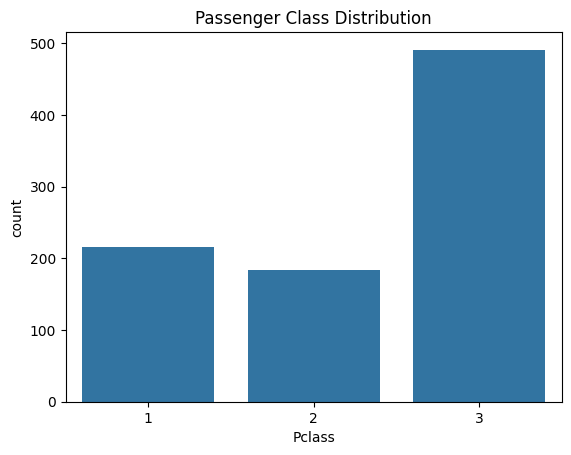

In [10]:
sns.countplot(x="Pclass", data=df)
plt.title("Passenger Class Distribution")
plt.show()


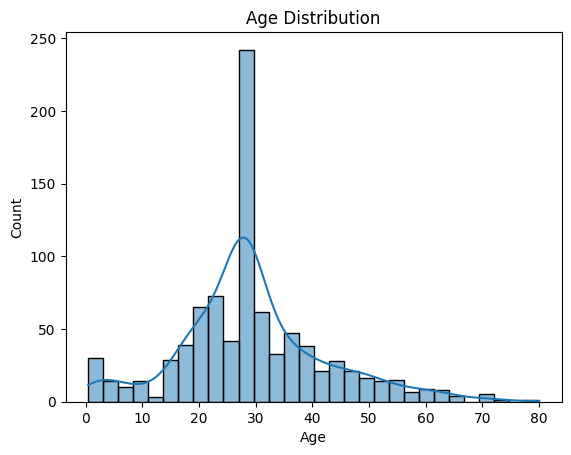

In [11]:
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()


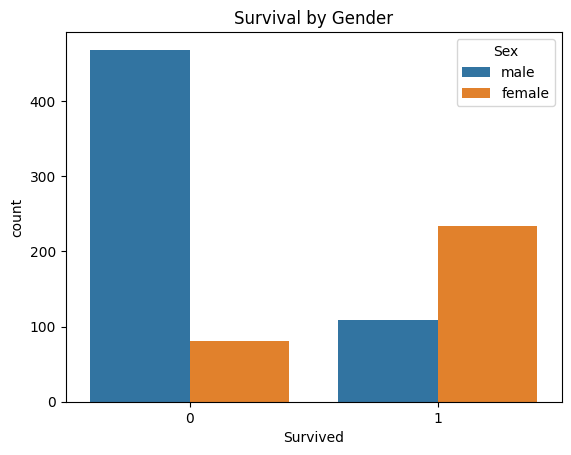

In [12]:
sns.countplot(x="Survived", hue="Sex", data=df)
plt.title("Survival by Gender")
plt.show()


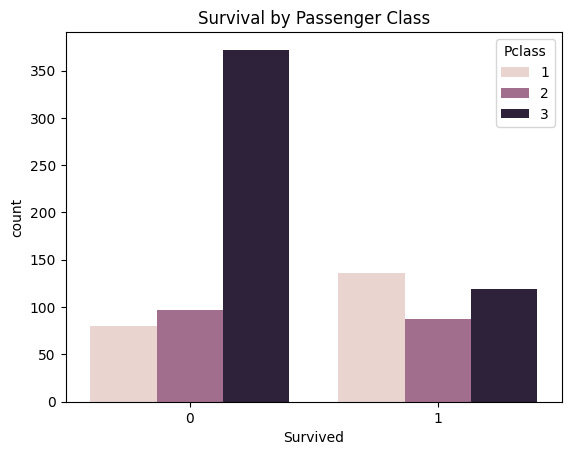

In [13]:
sns.countplot(x="Survived", hue="Pclass", data=df)
plt.title("Survival by Passenger Class")
plt.show()


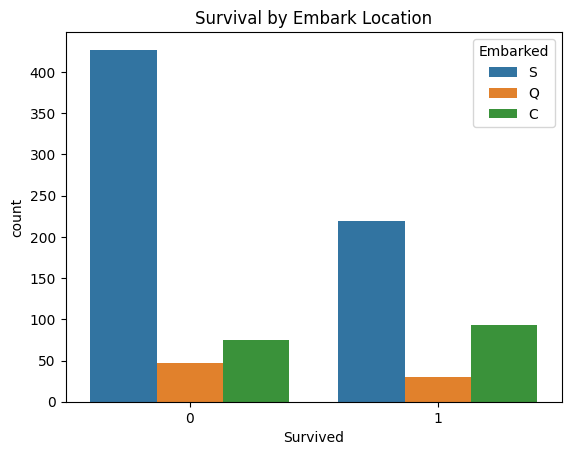

In [14]:
sns.countplot(x="Survived", hue="Embarked", data=df)
plt.title("Survival by Embark Location")
plt.show()


In [15]:
df["Survived"].mean()
# Survival rate overall

0.3838383838383838

In [16]:
df.groupby("Sex")["Survived"].mean().sort_values(ascending=False)
# Survival rate by gender

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [ ]:
df.groupby("Pclass")["Survived"].mean().sort_values(ascending=False)
# Survival rate by class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

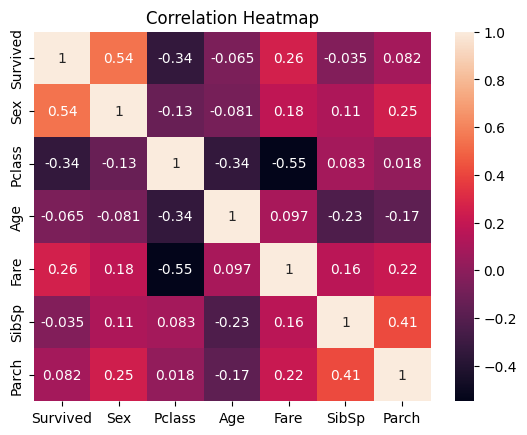

In [18]:
df_corr = df.copy()
df_corr["Sex"] = df_corr["Sex"].map({"male": 0, "female": 1})

corr = df_corr[["Survived", "Sex", "Pclass", "Age", "Fare", "SibSp", "Parch"]].corr()

sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()
# Correlation heatmap

## Key Insights
- Females had a higher survival rate than males.
- Passengers in 1st class survived more often than those in 3rd class.
- Fare tends to be higher for survivors (linked to passenger class).
- Age shows a weaker pattern compared to gender and class.

## Conclusion
This EDA explored survival patterns on the Titanic dataset. The most influential factors observed were gender and passenger class. Visual analysis and group statistics helped confirm these relationships.
